# Assignment 5 - Diabetes Classification Model

In [1]:
#importing all needed libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv file 
df = pd.read_csv('diabetes_data_upload.csv')

## EDA and Pre-processing

Checking for any missing values.

In [3]:
#checking for missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Using .describe() to give me a statistical summary of the numerical columns in the dataset (only the Age column)

In [4]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [5]:
#Shape of dataset
df.shape

(520, 17)

In [6]:
#displaying dataset
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


Dataset Balance
- It can be noted here that the dataset is unbalanced as there are a significant amount of more positive cases than negative

Text(0, 0.5, 'count')

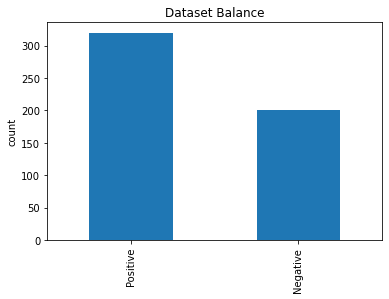

In [7]:
#checking the balance of the dataset
df['class'].value_counts().plot(kind='bar')
plt.title('Dataset Balance')
plt.ylabel('count')

Pie Chart 

This pie chart is showing the number of people that have diabetes split by gender. 

When looking at the chart one can notice that there are more female positive cases than men. When extracting information like this from a chart its important to note the percentage of the number of males and females in the study to begin with. 

The total number of women in the study is 192 and 173 of them being positive meaning 90% of the women in the study have diabetes whereas for the men 147 out of 328 were positive for diabetes (45%). 

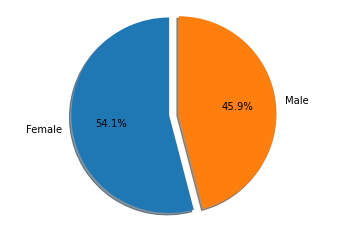

In [8]:
# Pie chart for positive cases by gender
gendersplit = pd.crosstab(df['Gender'], df['class'])
gendersplit['total'] = gendersplit['Negative'] +gendersplit['Positive']
gendersplit['perc'] = ((gendersplit['Positive']/gendersplit['total'])*100).round(2)

labels = 'Female', 'Male'
sizes = gendersplit['Positive']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
gendersplit

class,Negative,Positive,total,perc
Gender,,,,
Female,19,173,192,90.10
Male,181,147,328,44.82


The distribution graph and boxplot use the same data but are presented in different charts/graphs to show the different ways the same data can be presented. 

These graphs show the distribution of the survey takers age. You can see from the graph that the median age is just under 50 (the median in the boxplot is the line in the middle inside the box). 

From the boxplot you can also see the minimum, maximum, first quartile, third quartile and outliers. 

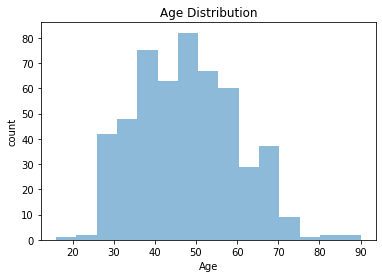

In [10]:
#distribution plot of age for positive cases
data = df['Age']
plt.hist(data, bins = 15, alpha=0.5, label = "class")
plt.title('Age Distribution')
plt.ylabel('count')
plt.xlabel('Age')
plt.subplots_adjust(hspace=0.5)

Text(0.5, 1.0, 'Boxplot of Age')

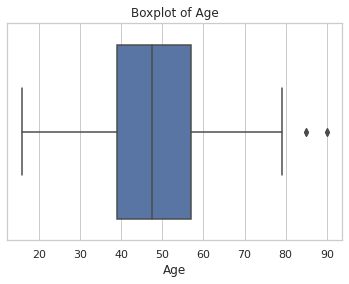

In [11]:
#boxplot of positive cases by age
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data)
plt.title('Boxplot of Age')

#### Encoding 

Most of the columns in the dataset are binary columns with strings “yes/no.” 

I converted all these columns to have 1/0 instead and used One Hot Encoding with the binary strategy for the gender column. 

The binary strategy essentially means that each category value was converted into a new column and assigned 1 or 0 based on that column encoded value. 

In [12]:
#encoding data to be 1/0 binary
encode_df = df.replace(["Yes", 'No'],[1,0])
encode_df['class'] = encode_df['class'].apply(lambda x: 1 if x == 'Positive' else 0)

In [13]:
#oneHotEncoding gender column
catecols = ['Gender']
for col in catecols: 
    dfeat = pd.get_dummies(encode_df[col], prefix=col, drop_first=False)
    
    #adding the new feature to the dataframe
    encode_df = pd.concat([encode_df, dfeat], axis=1)

Bar Graph of Features by Gender

The bar graph below shows the comparison between the positive counts for diabetes between men and women by the features. This is a good way to see which features are more prominent in positive cases of women or men. 

For example, from the chart you can see that genital thrush and alopecia is much more common for diabetes in men in this dataset while partial paresis and sudden weight loss is more common with women. 

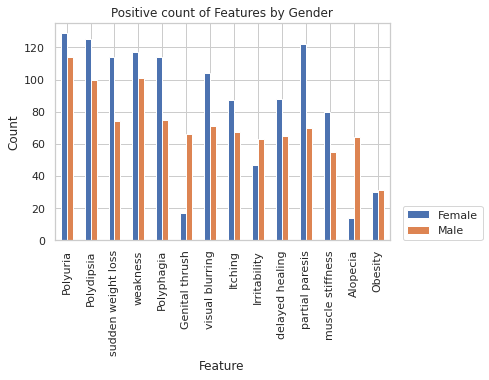

In [14]:
#plotting the feature for Males and Females for comparison
positive_case = encode_df[encode_df['class'] == 1]

Femaledf = positive_case[positive_case['Gender'] == 'Female']
Maledf = positive_case[positive_case['Gender'] == 'Male']
features_female = Femaledf.drop(['Age', 'Gender', 'class', 'Gender_Female', 'Gender_Male'], axis=1)
features_male = Maledf.drop(['Age', 'Gender', 'class', 'Gender_Male', 'Gender_Female'], axis=1)

fm = features_female.sum()
ml = features_male.sum()

fm = pd.DataFrame(fm)
ml = pd.DataFrame(ml)

frames = [fm, ml]
gender_features = pd.concat(frames, axis = 1)
gender_features.columns = ['Female', 'Male']

gender_features.plot(kind = 'bar')
plt.title('Positive count of Features by Gender')
plt.ylabel('Count')
plt.legend(loc=(1.04,0))
plt.xlabel('Feature')
plt.subplots_adjust(hspace=0.5)

Correlation Heat Map

The heatmap visualizes the correlation between the different variables. From the heatmap one can see that the two main features affecting the label (target variable) are Polyuria and Polydipsia. The relationship between all the other variables can also be observed from the correlation heatmap. 

In [15]:
#preparing the data for correlation matrix
encode_df_int = encode_df.drop(['Age', 'Gender'], axis=1)
dataset = encode_df.drop(['Gender'], axis=1)
dataset.rename(columns={'class': 'label'}, inplace=True)

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,label,Gender_Female,Gender_Male
Age,1.000000,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679,-0.062872,0.062872
Polyuria,0.199781,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922,0.268894,-0.268894
Polydipsia,0.137382,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734,0.312262,-0.312262
sudden weight loss,0.064808,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568,0.281840,-0.281840
weakness,0.224596,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275,0.124490,-0.124490
Polyphagia,0.315577,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504,0.219968,-0.219968
Genital thrush,0.096519,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288,-0.208961,0.208961
visual blurring,0.402729,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300,0.208092,-0.208092
Itching,0.296559,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384,0.052496,-0.052496
Irritability,0.201625,0.237740,0.203446,0.140340,0.146698,0.239466,0.160551,0.077095,0.114006,1.000000,0.126877,0.151571,0.201637,0.043708,0.127801,0.299467,0.013735,-0.013735


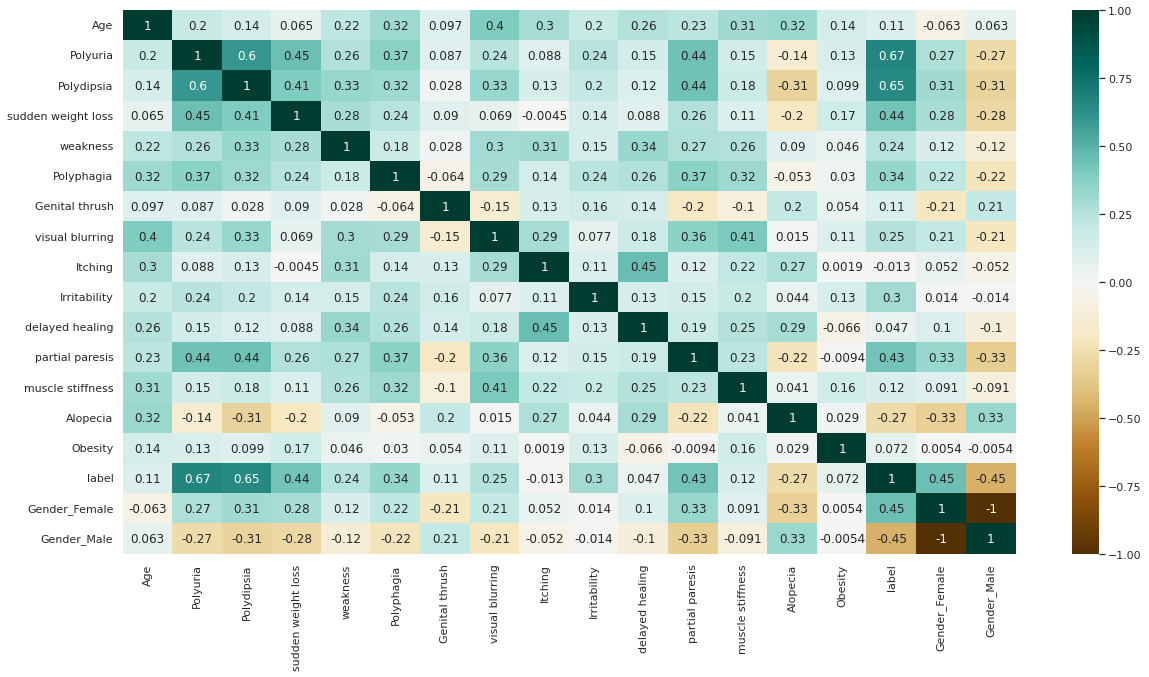

In [16]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
cor = dataset.corr()
sns.heatmap(cor,cmap='BrBG',annot=True)
cor

#### Feature Selection

Feature selection is used to minimize the number of input variables one needs for a model to predict the target variable. There are many different techniques for feature selection. The feature selection technique that was used in this model is Mutual Information with select K Best. Mutual information measures the dependencies between the variables. 

When the variables are independent from each other than the score is 0 and higher values mean higher dependency between the variables. The Select K best feature selection will then select the 10 best features based on the mutual information score.

In [17]:
# Seperating the dataset first into the feature dataframe and target variable (for now we will be using Q24_Encoded but the true target variable is Q24_buckets)
x = dataset.drop(['label'],axis=1)
y = dataset['label']

In [18]:
#changing format to dataframe
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [19]:
#creating array for target column
y = y.to_numpy()

In [20]:
#Feature selection techniques 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# define feature selection
fs = SelectKBest(score_func = mutual_info_classif,k=10)
#apply feature selection
x = fs.fit_transform(x, y.ravel())
print(x.shape)

(520, 10)


In [21]:
x = pd.DataFrame(x)

### Machine Learning Model

The two machine learning algorithms that were chosen for this classification model is Support Vector Machine (SVM) and Decision Tree Classifier. 

SVM was chosen since this algorithm is known for performing well on datasets with binary classification and outliers having minimal impact. Decision Tree Classifier was also chosen due to popularity with binary classification and its ability to quickly classify unknown records. 

Comparison of the two models were done using accuracy and confusion matrix which can be seen in below screenshots. The confusion matrix shows True Positives (predicted positive and its true), True Negative (predicted negative and its true), False Positive (predicted positive and its false), and False Negative (predicted negative and its false).

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")

In [23]:
# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [24]:
def SVC(X_train, X_test, y_train, y_test):

  # Classification algorithm, predictions, and Success metrics.
  model = LinearSVC()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  cm = confusion_matrix(y_test, pred)

  print('\nAccuracy of Support Vector Machine:', acc)
  print('\nConfusion Matrix of Support Vector Machine:\n', cm)

  return model, pred, acc, cm

In [25]:
SVC = SVC(X_train, X_test, y_train, y_test)


Accuracy of Support Vector Machine: 0.9294871794871795

Confusion Matrix of Support Vector Machine:
 [[47  7]
 [ 4 98]]


SVM had an accuracy of 0.929 and had TP of 47, FP of 7, FN of 4 and TN of 98

In [26]:
def DT(X_train, X_test, y_train, y_test):

  # Classification algorithm, predictions, and Success metrics.
  model = DecisionTreeClassifier(random_state=1)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  cm = confusion_matrix(y_test, pred)
    
  print('\nAccuracy of Decision Tree:', acc)
  print('\nConfusion Matrix of Decision Tree:\n', cm)
    
  return model, pred, acc, cm

In [27]:
DecTree = DT(X_train, X_test, y_train, y_test)


Accuracy of Decision Tree: 0.9423076923076923

Confusion Matrix of Decision Tree:
 [[51  3]
 [ 6 96]]


Decision Tree had an accuracy of 0.942 and had TP of 51, FP of 3, FN of 6 and TN of 96. 